In [12]:
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [13]:
pd.set_option('display.max_columns', None)  # Показать все столбцы
pd.set_option('display.width', 1900)        # Установить ширину области отображения

In [14]:
# Загрузка данных
data = pd.read_csv('low_variance_train.csv', sep=';') # Обратите внимание на путь файла

# Просмотр первых строк
# print(data.head())

**Метод ANOVA** используется для классификационных задач. Признаки, которые будут отбираться - числовые.

In [15]:
# Подготовка данных
X = data[['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]', 'Sum_Parametr']]  # Признаки
y = data['Machine failure']  # Целевая переменная

# Масштабируем данные, так как ANOVA чувствителен к масштабу признаков
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# Разделяем на обучающую и тестовую выборку
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Применяем метод ANOVA для выбора k лучших признаков
selector = SelectKBest(score_func=f_classif, k='all')  # 'all' выберет все признаки
X_new = selector.fit_transform(X_train, y_train)

# Получаем результаты анализа
scores = selector.scores_

# Выводим результаты
feature_names = X.columns
for feature, score in zip(feature_names, scores):
    print(f"{feature}: {score:.2f}")

# Сортируем признаки по их значимости
sorted_features = sorted(zip(feature_names, scores), key=lambda x: x[1], reverse=True)

print("\nОтсортированные признаки по важности:")
for feature, score in sorted_features:
    print(f"{feature}: {score:.2f}")

Air temperature [K]: 467.41
Process temperature [K]: 93.67
Rotational speed [rpm]: 1107.59
Torque [Nm]: 1917.38
Tool wear [min]: 328.31
Sum_Parametr: 154822.15

Отсортированные признаки по важности:
Sum_Parametr: 154822.15
Torque [Nm]: 1917.38
Rotational speed [rpm]: 1107.59
Air temperature [K]: 467.41
Tool wear [min]: 328.31
Process temperature [K]: 93.67


- **Признаки с высоким значением F-статистики** (высокий score) указывают на большую различимость между классами, что означает, что они более значимы для предсказания целевой переменной.
- **Признаки с низким значением F-статистики** (низкий score) не имеют значимого различия между классами, и их можно исключить из модели.

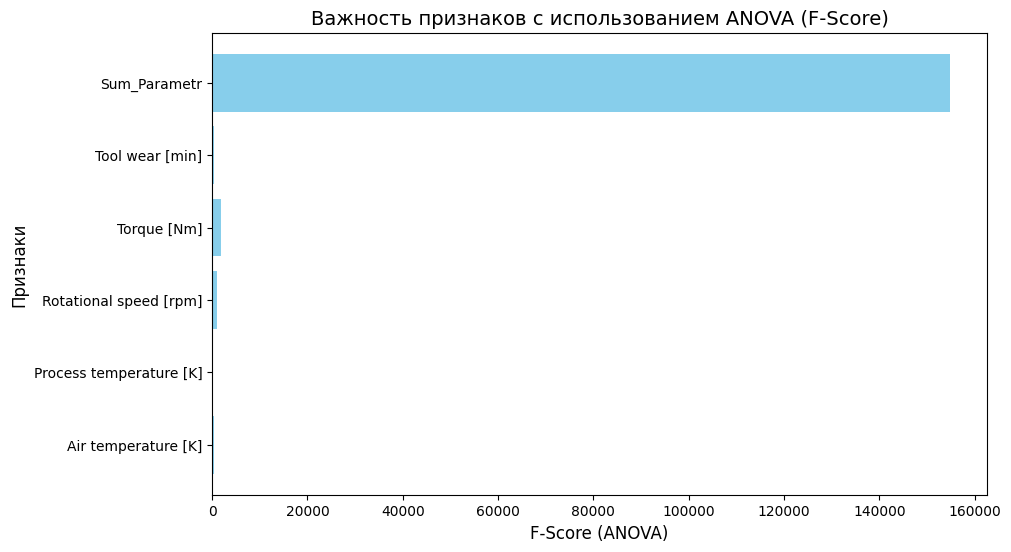

In [16]:
# Выведем ввиде графика
feature_names = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 
                 'Torque [Nm]', 'Tool wear [min]', 'Sum_Parametr']

# Создание графика
plt.figure(figsize=(10, 6))
plt.barh(feature_names, scores, color='skyblue')
plt.xlabel('F-Score (ANOVA)', fontsize=12)
plt.ylabel('Признаки', fontsize=12)
plt.title('Важность признаков с использованием ANOVA (F-Score)', fontsize=14)
plt.show()


### Выводы на основе результатов ANOVA:

1. **Sum_Parametr** имеет наибольший коэффициент важности (154822.15), что означает, что этот признак оказывает наибольшее влияние на целевую переменную (Machine failure). Это подтверждает его значимость для определения вероятности отказа оборудования.

2. **Torque [Nm]** и **Rotational speed [rpm]** также имеют высокие значения значимости (1917.38 и 1107.59 соответственно). Эти признаки, как и ожидается, сильно влияют на вероятность отказа, так как они напрямую связаны с работой механизма.

3. **Air temperature [K]** и **Tool wear [min]** имеют умеренную значимость, что может свидетельствовать о том, что температура и износ инструмента тоже важны для определения отказа оборудования, но их влияние немного слабее по сравнению с предыдущими признаками.

4. **Process temperature [K]** имеет наименьшую важность (93.67), что может означать, что этот параметр оказывает наименьшее влияние на целевую переменную и может быть менее значимым для предсказания отказа оборудования в данном датасете.

### Что дальше:
- **Sum_Parametr**, **Torque [Nm]**, и **Rotational speed [rpm]** могут быть использованы как ключевые признаки для дальнейшего анализа и построения модели.
- **Process temperature [K]** можно рассматривать как менее значимый признак для включения в модель, возможно, его можно исключить, если требуется уменьшить размерность данных.


In [17]:
# Сохранение предобработанных данных
data.to_csv('anova_train.csv', sep=';', index=False) # Обратите внимание на разделитесь!
print("Предобработка завершена. Данные сохранены в 'anova_train.csv'.")

Предобработка завершена. Данные сохранены в 'anova_train.csv'.
